<a href="https://colab.research.google.com/github/DoSiHoai/DoSiHoai_20146491_AI_2023/blob/main/Cifar10_31_3_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

Hinh anh [9]


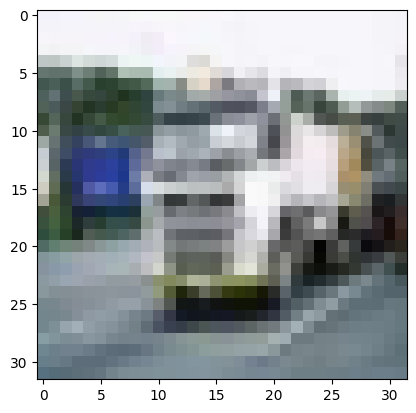

In [4]:
image = x_train[1000]
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show
print('Hinh anh', y_train[1000])

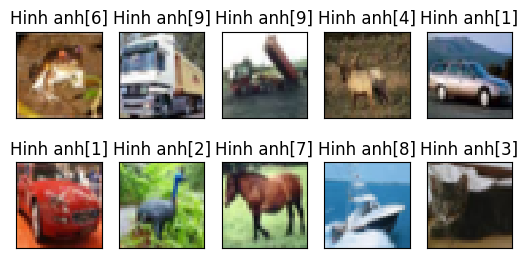

In [5]:
for i in range(10):
  plt.subplot(3, 5, i+1)
  plt.tight_layout
  plt.imshow(x_train[i], cmap = 'gray', interpolation = 'None')
  plt.title('Hinh anh{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
from keras.models import Sequential      #su tuan tu cac lop _ mang ANN
from keras.layers import Dense      #ket noi day du/ full connected
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (32*32*3,)))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [7]:
x_train = x_train.reshape((50000, 32*32*3))
x_train = x_train.astype('float32')/255
x_train.shape
x_test = x_test.reshape((10000, 32*32*3))
x_test = x_test.astype('float32')/255

x_test.shape

(10000, 3072)

In [8]:
from keras.utils import to_categorical # chuyen 1 bit thanh nhieu bit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(x_train, y_train, epochs= 20, batch_size= 128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Do mat mat:', test_loss)
print('Do chinh xac:', test_acc)

Epoch 1/20
391/391 [==============================] - 21s 52ms/step - loss: 2.1855 - accuracy: 0.2717
Epoch 2/20
391/391 [==============================] - 13s 32ms/step - loss: 1.8009 - accuracy: 0.3533
Epoch 3/20
391/391 [==============================] - 11s 28ms/step - loss: 1.7150 - accuracy: 0.3895
Epoch 4/20
391/391 [==============================] - 12s 30ms/step - loss: 1.6600 - accuracy: 0.4106
Epoch 5/20
391/391 [==============================] - 14s 36ms/step - loss: 1.6168 - accuracy: 0.4285
Epoch 6/20
391/391 [==============================] - 12s 30ms/step - loss: 1.5857 - accuracy: 0.4398
Epoch 7/20
391/391 [==============================] - 12s 30ms/step - loss: 1.5651 - accuracy: 0.4493
Epoch 8/20
391/391 [==============================] - 12s 30ms/step - loss: 1.5387 - accuracy: 0.4576
Epoch 9/20
391/391 [==============================] - 12s 30ms/step - loss: 1.5229 - accuracy: 0.4620
Epoch 10/20
391/391 [==============================] - 12s 30ms/step - loss: 1.505

In [9]:
from keras.saving.saving_api import load_model
model.save('test1.h5')
model10 = load_model('test1.h5')

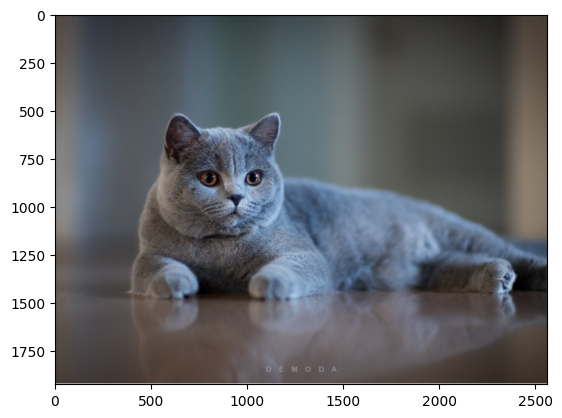

In [12]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np
from PIL import Image

img = Image.open('anhmeo.jpg')
imshow(img)

In [14]:
img = load_img('anhmeo.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

1/1 [==============================] - 0s 79ms/step


array([0])

# Mục mới